# Starting Kit - Relevance 
#### Regressor using full dataset

***
# Setup
***
`COLAB` determines whether this notebook is running on Google Colab.

In [1]:
COLAB='google.colab' in str(get_ipython())

In [2]:
if COLAB:
    # clone github repo
    !git clone https://github.com/ihsaan-ullah/M1-Challenge-Class-2024.git

    # move to the HEP starting kit folder
    %cd M1-Challenge-Class-2024/Relevance/Starting_Kit/

    !pip install -q --upgrade sentence-transformers transformers


***
# Imports
***

In [3]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from tqdm.notebook import tqdm

from sentence_transformers import SentenceTransformer
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from scipy.stats import kendalltau
from sklearn.metrics import cohen_kappa_score

import torch
import random

from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings("ignore")
tqdm.pandas()

C:\Users\Paulo Couto\anaconda3\envs\M1_AI-Challenge\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [4]:
random.seed(0)
torch.manual_seed(0)
np.random.seed(0)

***
# Directories
***

In [5]:
root_dir = "./"
# Input data directory to read training data from
input_dir = root_dir + "sample_data/"
# Reference data directory to read test labels from
reference_dir = root_dir + "sample_data/"
# Output data directory to write predictions to
output_dir = root_dir + "sample_result_submission"
# Program directory
program_dir = root_dir + "ingestion_program"
# Score directory
score_dir = root_dir + "scoring_program"
# Directory to read submitted submissions from
submission_dir = root_dir + "sample_code_submission"

***
# Add directories to path
***

In [6]:
sys.path.append(input_dir)
sys.path.append(reference_dir)
sys.path.append(reference_dir)
sys.path.append(output_dir)
sys.path.append(program_dir)
sys.path.append(submission_dir)

***
# Data
***
1. Load Data
2. Preprocess data


### ⚠️ Note:
The data used here is sample data is for demonstration only to get a view of what the data looks like.

In [7]:
class Data():

  def __init__(self):

    self.df = None

    print("==========================================")
    print("Data")
    print("==========================================")

  def load_data(self):
    #  Load data from a CSV file into a Pandas DataFrame.
    print("[*] Loading Data")

    # data file path
    input_data_file = os.path.join(input_dir, 'input_data.csv')
    refer_data_file = os.path.join(reference_dir, 'reference_data.csv')

    # read data
    input_df = pd.read_csv(input_data_file)
    refer_df = pd.read_csv(refer_data_file)

    self.X_train = input_df.iloc[:, :-1].values
    self.y_train = input_df.iloc[:, -1].values

    self.X_test = refer_df.iloc[:, :-1].values
    self.y_test = refer_df.iloc[:, -1].values
  def get_train_data(self):
    return self.X_train, self.y_train
  
  def get_test_data(self):
    return self.X_test, self.y_test
  
  def show_data_stats(self):
    print("X_train shape: ", np.shape(self.X_train))
    print("y_train shape: ", np.shape(self.y_train))
    print("X_test shape: ", np.shape(self.X_test))
    print("y_test shape: ", np.shape(self.y_test))

In [8]:
# Initilaize data
data = Data()

Data


In [9]:
# load data
data.load_data()

[*] Loading Data


In [10]:
# get train test data
X_train, y_train = data.get_train_data()
X_test, y_test = data.get_test_data()

In [11]:
data.show_data_stats()

X_train shape:  (80524, 384)
y_train shape:  (80524,)
X_test shape:  (20132, 384)
y_test shape:  (20132,)


***
# Import Submission Model
***
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: initializes classifier
- `fit`: gets train data and labels as input to train the classifier
- `predict`: gets test data and outputs predictions made by the trained classifier


In this example code, the `Model` class implements a Gradient Boosting Classifier model. You can find the code in `M1-Challenge-Class-2024/Relevance/Starting_Kit/sample_code_submission/model.py`. You can modify it the way you want, keeping the required class structure and functions there. More instructions are given inside the `model.py` file. If running in Collab, click the folder icon in the left sidebar to open the file browser.

In [12]:
from model import Model

***
# Program
***
**`Ingestion program`** is responsible to run the submission of a participant on Codabench platform. **`Program`** is a simplified version of the **Ingestion Program** to show to participants how it runs a submission.
1. Train a model on train data
2. Predict using Test data

In [13]:
class Program():

    def __init__(self, data):

        # used to keep object of Model class to run the submission
        self.model = None
        # object of Data class used here to get the train and test sets
        self.data = data

        # results
        self.results = []

        print("==========================================")
        print("Program")
        print("==========================================")
    
    def initialize_submission(self):
        print("[*] Initializing Submmited Model")
        self.model = Model()

    def fit_submission(self):
        print("[*] Calling fit method of submitted model")
        X_train, y_train  = self.data.get_train_data()
        self.model.fit(X_train, y_train)


    def predict_submission(self):
        print("[*] Calling predict method of submitted model")
      
        X_test, _ = self.data.get_test_data()
        self.y_test_hat = self.model.predict(X_test)


In [14]:
# Intiialize Program
program = Program(data=data)

Program


In [15]:
# Initialize submitted model
program.initialize_submission()

[*] Initializing Submmited Model
[*] - Initializing Classifier


In [16]:
# Call fit method of submitted model
program.fit_submission()

[*] Calling fit method of submitted model
[*] - Training Classifier on the train set


In [17]:
# Call predict method of submitted model
program.predict_submission()

[*] Calling predict method of submitted model
[*] - Predicting test set using trained Classifier


***
# Score
***

The model’s performance is evaluated using several metrics, including precision, recall, F1-score, and Kendall’s Tau. These metrics provide a comprehensive view of the model’s performance across all classes. Precision measures the model’s exactness, recall measures its completeness, the F1-score balances precision and recall, and Kendall’s Tau measures the correlation between the predicted and actual rankings. 

1.	Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is also known as Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

2.	Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all the actual positives. It is also known as Sensitivity, Hit Rate, or True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

3.	F1 Score: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

4.	Support: Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.

5.	Accuracy: Accuracy is the most intuitive performance measure. It is simply a ratio of correctly predicted observation to the total observations. One may think that if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost the same.

6.	Macro Avg: Macro-average method can be used when you want to know how the model performs overall across the sets of data. You should not come up with any specific decision with this average.

7.	Weighted Avg: In contrary to macro-average method, if you want to know how the model is performing with respect to the most frequent class, you should use a weighted-average method. This will aggregate the contributions of all classes to compute the average metric.

8.	Kendall’s Tau: Kendall’s Tau is a measure of correlation. It gives a value between -1 and 1. A value close to 1 means that there’s a strong positive correlation between the two variables, and a value close to -1 means that there’s a strong negative correlation. A value close to 0 means that there’s no correlation. In your case, the value is approximately 0.70, indicating a good agreement.

More info in: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


In [18]:
class Score():

    def __init__(self, data, program):

        self.data = data
        self.program = program

        print("==========================================")
        print("Score")
        print("==========================================")

    def compute_scores(self):
        print("[*] Computing scores")

        _, y_test = self.data.get_test_data()
        y_test_hat = self.program.y_test_hat

        k_tau, _ = kendalltau(y_test, y_test_hat)
        print(f"Kendall's Tau: {round(k_tau, 3)}")

In [19]:
# Initialize Score
score = Score(data=data, program=program)

Score


In [20]:
# Compute Score
score.compute_scores()

[*] Computing scores
Kendall's Tau: 0.719


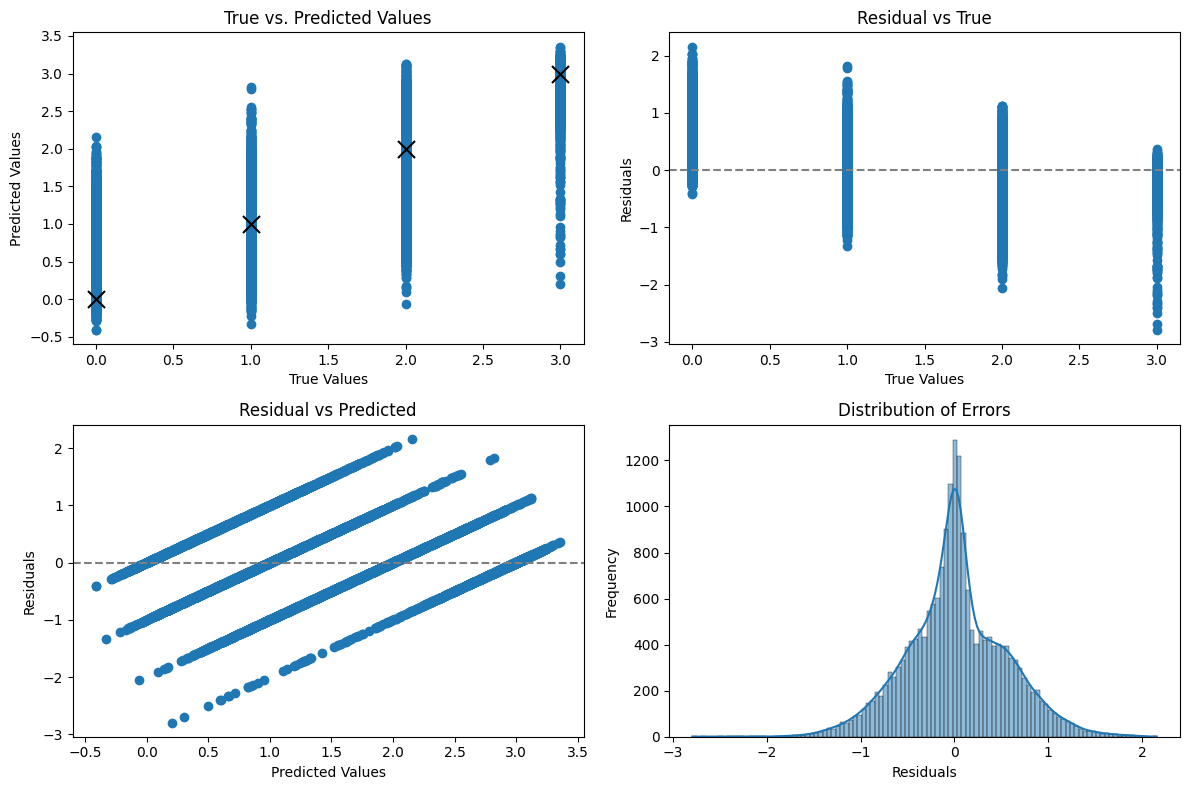

In [21]:
# Plotting
plt.figure(figsize=(12, 8))

residuals = program.y_test_hat - y_test
    
# Scatter Plot of True vs. Predicted Values
plt.subplot(2, 2, 1)
plt.scatter(y_test, program.y_test_hat)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.scatter(0, 0, color='black', marker='x', s=150)
plt.scatter(1, 1, color='black', marker='x', s=150)
plt.scatter(2, 2, color='black', marker='x', s=150)
plt.scatter(3, 3, color='black', marker='x', s=150)

# Residual Plot vs truth
plt.subplot(2, 2, 2)
plt.scatter(y_test, residuals)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual vs True')
plt.axhline(y=0, color='grey', linestyle='--')

# Residual Plot vs predicted
plt.subplot(2, 2, 3)
plt.scatter(program.y_test_hat, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Predicted')
plt.axhline(y=0, color='grey', linestyle='--')
  
# Distribution of Errors Plot
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
    
plt.tight_layout()
plt.show()

***
# Submissions
***

### **Unit Testing**

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

### **Test Ingestion Program**

In [22]:
# !python $program_dir/ingestion.py

### **Test Scoring Program**

In [23]:
# !python $score_dir/score.py

### **Prepare the submission**

In [24]:
"""
import datetime
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'Relevance-Baseline1-Sample_Data-Code_Submission_' + the_date + '.zip'
zipdir(code_submission, submission_dir)
print("Submit : " + code_submission + " to the competition")
print("You can find the zip file in `M1-Challenge-Class-2024/Relevance/Starting_Kit/")
"""

'\nimport datetime\nfrom data_io import zipdir\nthe_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")\ncode_submission = \'Relevance-Baseline1-Sample_Data-Code_Submission_\' + the_date + \'.zip\'\nzipdir(code_submission, submission_dir)\nprint("Submit : " + code_submission + " to the competition")\nprint("You can find the zip file in `M1-Challenge-Class-2024/Relevance/Starting_Kit/")\n'